In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


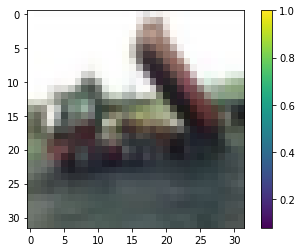

In [4]:
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
plt.grid(False)

plt.show()

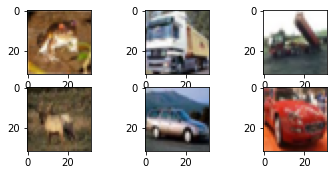

In [5]:
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

In [6]:
num_class = len(set(y_train))
print("Number Of Classes: ", num_class)

Number Of Classes:  10


In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), padding="same", activation="relu")(i)
x = Conv2D(32, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.30)(x)
x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
x = Conv2D(64, (3,3), activation="relu")(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.30)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(num_class, activation="softmax")(x)

model = Model(i, x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                           

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
  83/1563 [>.............................] - ETA: 3:52 - loss: 2.2531 - accuracy: 0.1939

KeyboardInterrupt: ignored

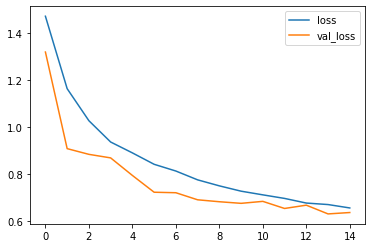

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

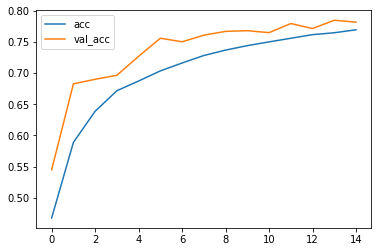

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()